<b>Assignment - Preprocessing of features </b>
<br><i>Submitted by - Anu Zacharia , M.Tech DS&AI </i>

In [ ]:
# Imports 
from sklearn import datasets
import pandas as pd

# Load Data
iris = datasets.load_iris()
#print('The classification target:\n',iris['target'])
#print('The names of the dataset columns:\n',iris['feature_names'])
#print('The names of target classes:\n',iris['target_names'])
#print('The full description of the dataset:\n',iris['DESCR'])
#print('The path to the location of the data:\n',iris['filename'])
#print('The data matrix:\n',iris['data'])
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df.head()

#boston = datasets.load_boston()
#print('The names of the dataset columns:\n',boston['feature_names'])
#print('The full description of the dataset:\n',boston['DESCR'])
#print('The path to the location of the data:\n',boston['filename'])
#df_boston = pd.DataFrame(boston.data, columns=boston.feature_names)
#df_boston.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Features in the training data can have different units of measurement.<br> As a result, each feature can have its own unique distribution of values.
<br> Incorporating features with different distributions can lead to a model showing bias towards features with larger values and variance.
<br> Feature scaling addresses this issue by fitting all data to a specific scale. It is  a necessary component in feature engineering.
<br> <br>The two most common methods of feature scaling are standardization and normalization.
<br>Standardization is ideal for data that fits a normal/gaussian distribution.
<br>It is also superior when handling data with outliers as it is more resistant to extreme values. Standardization is often used in PCA, where the aim is to maximize variance while reducing dimensionality.
<br>Normalization, on the other hand, is the safer alternative when we are unsure of the distribution of  data.
<br><br> <b> Standardization</b>
<br> Standardization entails scaling data to fit a standard normal distribution.
<br>A standard normal distribution is defined as a distribution with a mean of 0 and a standard deviation of 1.

In [ ]:
from sklearn.preprocessing import StandardScaler
df_s = df.copy()
std_scaler = StandardScaler()
df_s.iloc[:, [0, 1, 2,3]] = std_scaler.fit_transform(df_s.iloc[:, [0, 1, 2,3]])
df_s.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,-0.900681,1.019004,-1.340227,-1.315444,0
1,-1.143017,-0.131979,-1.340227,-1.315444,0
2,-1.385353,0.328414,-1.397064,-1.315444,0
3,-1.506521,0.098217,-1.283389,-1.315444,0
4,-1.021849,1.249201,-1.340227,-1.315444,0


<b>Plotting histograms before and after scaling</b>
<br>After being scaled, the data has a mean of 0 and a standard deviation of 1.
<br>However, even with a considerable change in values, the shape of the distribution is kept relatively intact after the transformation. This is key in scaling as the information stored in the features has to be preserved.

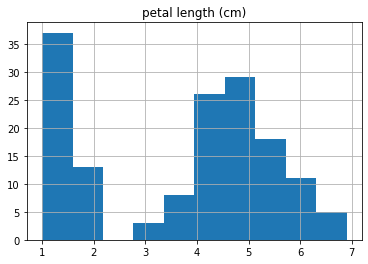

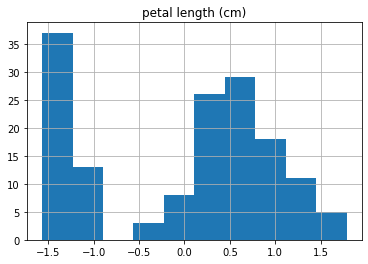

In [ ]:
# plot histograms
import matplotlib.pyplot as plt
hist = df.hist('petal length (cm)')
hist = df_s.hist('petal length (cm)')

<b>Normalization</b>
<br>Normalizing entails scaling data to fit into a specific range [0, 1] or [−1, 1].


In [ ]:
from sklearn.preprocessing import MinMaxScaler
df_n = df.copy()
min_max_scaler = MinMaxScaler()
df_n.iloc[:, [0, 1, 2, 3]] = min_max_scaler.fit_transform(df_n.iloc[:, [0, 1, 2, 3]])
df_n.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,0.222222,0.625000,0.067797,0.041667,0
1,0.166667,0.416667,0.067797,0.041667,0
2,0.111111,0.500000,0.050847,0.041667,0
3,0.083333,0.458333,0.084746,0.041667,0
4,0.194444,0.666667,0.067797,0.041667,0


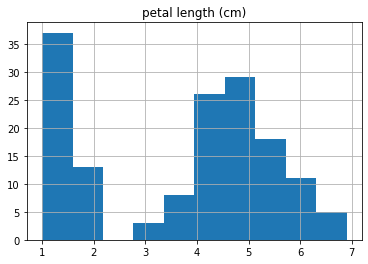

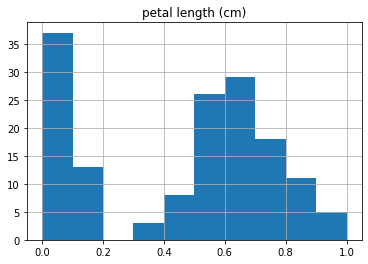

In [ ]:
# plot histograms
import matplotlib.pyplot as plt
hist = df.hist('petal length (cm)')
hist = df_n.hist('petal length (cm)')

<b>Label encoding</b>
<br>As most of the algorithms work better with numerical inputs, the text/categorical data have to be converted into numerical data <br>Neural networks expect input values to be numerical.

In [ ]:
iris_csv_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
df_iris = pd.read_csv(iris_csv_url, header = None)
df_iris.columns =['SL', 'SW', 'PL', 'PW','Species']
df_iris['Species'].unique()

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_iris['Species_encoded'] = le.fit_transform(df_iris["Species"])
print(df_iris['Species_encoded'].value_counts())
df_iris.drop(['Species'], axis=1, inplace=True)
df_iris.head()



0    50
1    50
2    50
Name: Species_encoded, dtype: int64


,SL,SW,PL,PW,Species_encoded
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


<b>OneHot encoding method</b>
<br>One-hot encoding converts the categorical data into numeric data by splitting the column into multiple columns. The numbers are replaced by 1s and 0s, depending on which column has what value.

<br>Scikit-Learn library offers both the <b>OneHotEncoder </b>class and the <b>LabelBinarizer</b> class for this purpose.

 OneHotEncoder class supports multi-column data.



 <b>LabelBinarizer</b>

In [ ]:
iris_csv_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
df_iris = pd.read_csv(iris_csv_url, header = None)
df_iris.columns =['SL', 'SW', 'PL', 'PW','Species']
df_iris['Species'].unique()
print(df_iris['Species'].value_counts())
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
#y = LabelBinarizer().fit_transform(df_iris.Species)
#print(y)
df_iris = df_iris.join(pd.DataFrame(lb.fit_transform(df_iris.Species),
                          columns=lb.classes_, 
                          index=df_iris.index))
print(df_iris['Iris-setosa'].value_counts())
print(df_iris['Iris-versicolor'].value_counts())
print(df_iris['Iris-virginica'].value_counts())
df_iris.head()


Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64
0    100
1     50
Name: Iris-setosa, dtype: int64
0    100
1     50
Name: Iris-versicolor, dtype: int64
0    100
1     50
Name: Iris-virginica, dtype: int64


,SL,SW,PL,PW,Species,Iris-setosa,Iris-versicolor,Iris-virginica
0,5.1,3.5,1.4,0.2,Iris-setosa,1,0,0
1,4.9,3.0,1.4,0.2,Iris-setosa,1,0,0
2,4.7,3.2,1.3,0.2,Iris-setosa,1,0,0
3,4.6,3.1,1.5,0.2,Iris-setosa,1,0,0
4,5.0,3.6,1.4,0.2,Iris-setosa,1,0,0


<b>OneHot encoding</b>

In [ ]:
iris_csv_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
df_iris = pd.read_csv(iris_csv_url, header = None)
df_iris.columns =['SL', 'SW', 'PL', 'PW','Species']

from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
species_array = ohe.fit_transform(df_iris[['Species']]).toarray()
#print(y)
species_categories = ohe.categories_[0]

df_iris = df_iris.join(pd.DataFrame(species_array, columns=species_categories))
print(df_iris['Iris-setosa'].value_counts())
print(df_iris['Iris-versicolor'].value_counts())
print(df_iris['Iris-virginica'].value_counts())
df_iris.head()

0.0    100
1.0     50
Name: Iris-setosa, dtype: int64
0.0    100
1.0     50
Name: Iris-versicolor, dtype: int64
0.0    100
1.0     50
Name: Iris-virginica, dtype: int64


,SL,SW,PL,PW,Species,Iris-setosa,Iris-versicolor,Iris-virginica
0,5.1,3.5,1.4,0.2,Iris-setosa,1.0,0.0,0.0
1,4.9,3.0,1.4,0.2,Iris-setosa,1.0,0.0,0.0
2,4.7,3.2,1.3,0.2,Iris-setosa,1.0,0.0,0.0
3,4.6,3.1,1.5,0.2,Iris-setosa,1.0,0.0,0.0
4,5.0,3.6,1.4,0.2,Iris-setosa,1.0,0.0,0.0




<b>Discretization </b>
<br>Discretization is the process through which we can transform continuous variables, models or functions into a discrete form.

Values for the variable are grouped together into discrete bins and each bin is assigned a unique integer such that the ordinal relationship between the bins is preserved.

Different methods for grouping the values into k discrete bins can be used; common techniques include:

Uniform: Each bin has the same width in the span of possible values for the variable.

Quantile: Each bin has the same number of values, split based on percentiles.

Clustered: Clusters are identified and examples are assigned to each group.

The “strategy” argument controls the manner in which the input variable is divided, as either “uniform,” “quantile,” or “kmeans.”

The “n_bins” argument controls the number of bins that will be created and must be set based on the choice of strategy, e.g. “uniform” is flexible, “quantile” must have a “n_bins” less than the number of observations or sensible percentiles, and “kmeans” must use a value for the number of clusters that can be reasonably found.

The “encode” argument controls whether the transform will map each value to an integer value by setting “ordinal” or a one-hot encoding “onehot.” An ordinal encoding is almost always preferred, although a one-hot encoding may allow a model to learn non-ordinal relationships between the groups, such as in the case of k-means clustering strategy

1. Quantile Discretization Transform


In [ ]:
from sklearn.preprocessing import KBinsDiscretizer
trans = KBinsDiscretizer(n_bins = 3,encode = 'ordinal',strategy = 'quantile')
new_data = trans.fit_transform(df)
pd.DataFrame(new_data , columns = df.columns)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,0.0,2.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0
2,0.0,2.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0
4,0.0,2.0,0.0,0.0,0.0
...,...,...,...,...,...
145,2.0,1.0,2.0,2.0,2.0
146,2.0,0.0,2.0,2.0,2.0
147,2.0,1.0,2.0,2.0,2.0
148,1.0,2.0,2.0,2.0,2.0



2. Uniform Discretization Transform

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer
trans = KBinsDiscretizer(n_bins = 3,encode = 'ordinal',strategy = 'uniform')
new_data = trans.fit_transform(df)
pd.DataFrame(new_data , columns = df.columns)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0
4,0.0,2.0,0.0,0.0,0.0
...,...,...,...,...,...
145,2.0,1.0,2.0,2.0,2.0
146,1.0,0.0,2.0,2.0,2.0
147,1.0,1.0,2.0,2.0,2.0
148,1.0,1.0,2.0,2.0,2.0



3. KMeans Discretization Transform

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer
trans = KBinsDiscretizer(n_bins = 3,encode = 'ordinal',strategy = 'kmeans')
new_data = trans.fit_transform(df)
pd.DataFrame(new_data , columns = df.columns)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,0.0,2.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0
4,0.0,2.0,0.0,0.0,0.0
...,...,...,...,...,...
145,2.0,1.0,2.0,2.0,2.0
146,1.0,0.0,2.0,2.0,2.0
147,1.0,1.0,2.0,2.0,2.0
148,1.0,1.0,2.0,2.0,2.0


<b>Feature selection</b> <Br>

There are three key methods to perform feature selection 


*   Filter methods
*   Wrapper methods
*   Embedded methods


<b>Filter methods</b>

The classes in the sklearn.feature_selection module can be used for feature selection/dimensionality reduction on sample sets, either to improve estimators accuracy scores or to boost their performance on very high-dimensional datasets.



1. ANOVA F-value
ANOVA F-value method estimates the degree of linearity between the input feature (i.e., predictor) and the output feature. A high F-value indicates high degree of linearity and a low F-value indicates low degree of linearity. The main disadvantage of using ANOVA F-value is it only captures linear relationships between input and output feature. In other words, any non-linear relationships cannot be detected by F-value.

 Scikit-learn has two functions to calculate F-value:

f_classif, which calculate F-value between input and output feature for classification task
f_regression, which calculate F-value between input and output feature for classification task
Using f_classif as the Iris dataset entails classification task

('sepal length (cm)', 119.26450218449871)
('sepal width (cm)', 49.16004008961098)
('petal length (cm)', 1180.1611822529776)
('petal width (cm)', 960.0071468018025)


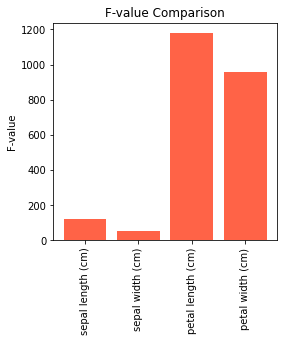

In [ ]:
from sklearn.datasets import load_iris
feature_names = load_iris().feature_names
X_data = pd.DataFrame(load_iris().data, columns=feature_names)
y_data = load_iris().target

from sklearn.feature_selection import f_classif
f_value = f_classif(X_data, y_data)

# Print the name and F-value of each feature
for feature in zip(feature_names, f_value[0]):
    print(feature)

# Create a bar chart for visualizing the F-values
plt.figure(figsize=(4,4))
plt.bar(x=feature_names, height=f_value[0], color='tomato')
plt.xticks(rotation='vertical')
plt.ylabel('F-value')
plt.title('F-value Comparison')
plt.show()

2.<b>Variance Threshold</b><br>
Variance threshold method removes features whose variance below a pre-defined cutoff value. It is based on the notion that features that do not vary much within themselves have low predictive power. The main weakness of variance threshold is that it does not consider the relationship of input features with the output feature.

Before performing variance thresholding, all features should be standardized so they will have the same scale.

Scikit-learn provides VarianceThreshold function to perform variance threshold method.

By default, VarianceThreshold removes only zero-variance features. Zero-variance feature means that the feature has the same value in all instances. If we want to eliminate features that have variance score below 0.2, we can specify threshold parameter.

('sepal length (cm)', 0.6811222222222222)
('sepal width (cm)', 0.1887128888888887)
('petal length (cm)', 3.0955026666666674)
('petal width (cm)', 0.5771328888888888)


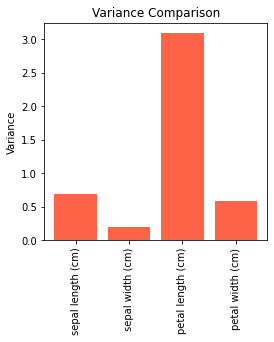

In [ ]:
from sklearn.feature_selection import VarianceThreshold
# Create VarianceThreshold object to perform variance thresholding
selector = VarianceThreshold()

# Perform variance thresholding
selector.fit_transform(X_data)

# Print the name and variance of each feature
for feature in zip(feature_names, selector.variances_):
    print(feature)

# Create a bar chart for visualizing the variances
plt.figure(figsize=(4,4))
plt.bar(x=feature_names, height=selector.variances_, color='tomato')
plt.xticks(rotation='vertical')
plt.ylabel('Variance')
plt.title('Variance Comparison')

plt.show()

In [ ]:
# Create VarianceThreshold object to perform variance thresholding
selector = VarianceThreshold(threshold=0.2)

# Transform the dataset according to variance thresholding
X_data_new = selector.fit_transform(X_data)

# Print the results
print('Number of features before variance thresholding: {}'.format(X_data.shape[1]))
print('Number of features after variance thresholding: {}'.format(X_data_new.shape[1]))


Number of features before variance thresholding: 4
Number of features after variance thresholding: 3


3. <b>Mutual Information</b><br>
Mutual information (MI) measures the dependence of one variable to another by quantifying the amount of information obtained about one feature, through the other feature. MI is symmetric and non-negative, and is zero if and only if the input and output feature are independent. Unlike ANOVA F-value, mutual information can capture non-linear relationships between input and output feature.

We can use Scikit-learn to calculate MI. Scikit-learn has two functions to calculate MI:

mutual_info_classif, which calculate MI for classification task
mutual_info_regression, which calculate MI for regression task
We will use mutual_info_classif because the Iris dataset entails a classification task.


('sepal length (cm)', 0.4738732342805525)
('sepal width (cm)', 0.28607227699171767)
('petal length (cm)', 0.9895851732491787)
('petal width (cm)', 0.9749379656705233)


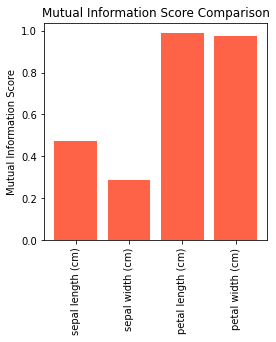

In [ ]:
# Import mutual_info_classif from Scikit-learn
from sklearn.feature_selection import mutual_info_classif
# Create mutual_info_classif object to calculate mutual information
MI_score = mutual_info_classif(X_data, y_data, random_state=0)

# Print the name and mutual information score of each feature
for feature in zip(feature_names, MI_score):
    print(feature)

# Create a bar chart for visualizing the mutual information scores
plt.figure(figsize=(4,4))
plt.bar(x=feature_names, height=MI_score, color='tomato')
plt.xticks(rotation='vertical')
plt.ylabel('Mutual Information Score')
plt.title('Mutual Information Score Comparison')

plt.show()

4. <b>Using Selector Object for Selecting Features</b>
<br>
We can use SelectKBest from Scikit-learn to select features according to the k highest scores, determined by a filter method. First, we need to import SelectKBest.

SelectKBest has two important parameters:

score_func: the filter function that is used for feature selection
k: the number of top features to select



In [ ]:
# Import SelectKBest from Scikit-learn
from sklearn.feature_selection import SelectKBest
# Create a SelectKBest object
skb = SelectKBest(score_func=f_classif, # Set f_classif as our criteria to select features
                  k=2)                  # Select top two features based on the criteria

# Train and transform the dataset according to the SelectKBest
X_data_new = skb.fit_transform(X_data, y_data)

# Print the results
print('Number of features before feature selection: {}'.format(X_data.shape[1]))
print('Number of features after feature selection: {}'.format(X_data_new.shape[1]))

# Print the name of the selected features
for feature_list_index in skb.get_support(indices=True):
    print('- ' + feature_names[feature_list_index])

Number of features before feature selection: 4
Number of features after feature selection: 2
- petal length (cm)
- petal width (cm)


<b>Wrapper Methods</b><br>
Wrapper methods try to find a subset of features that yield the best performance for a model by training, evaluating, and comparing the model with different combinations of features. Wrapper methods enable the detection of relationships among features. However, they can be computationally expensive, especially if the number of features is high. The risk of overfitting is also high if the number of instances in the dataset is insufficient.

There are some diferrences between filter and wrapper methods:

Filter methods do not incorporate a machine learning model in order to determine if a feature is good or bad whereas wrapper methods use a machine learning model and train it the feature to decide if it is essential or not.
Filter methods are much faster compared to wrapper methods as they do not involve training the models. On the other hand, wrapper methods are computationally costly, and in the case of massive datasets, wrapper methods are not the most effective feature selection method to consider.
Filter methods may fail to find the best subset of features in situations when there is not enough data to model the statistical correlation of the features, but wrapper methods can always provide the best subset of features because of their exhaustive nature.

Using features from wrapper methods in the final machine learning model can lead to overfitting as wrapper methods already train machine learning models with the features and it affects the true power of learning. But the features from filter methods will not lead to overfitting in most of the cases.

There are mainly three wrapper methods:

Exhaustive feature selection (EFS)
Sequential forward selection (SFS)
Sequential backward selection (SBS)

<b>Exhaustive Feature Selection (EFS)</b>
<br>EFS finds the best subset of features by evaluating all feature combinations. Suppose we have a dataset with three features. EFS will evaluate the following feature combinations:

feature_1
feature_2
feature_3
feature_1 and feature_2
feature_1 and feature_3
feature_2 and feature_3
feature_1, feature_2, and feature_3
EFS selects a subset that generates the best performance (e.g., accuracy, precision, recall, etc.) of the model being considered.

Mlxtend provides ExhaustiveFeatureSelector function to perform EFS.

In [ ]:
# Import ExhaustiveFeatureSelector from Mlxtend

from sklearn.linear_model import LogisticRegression
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS


feature_names = load_iris().feature_names
#X_data = pd.DataFrame(load_iris().data, columns=feature_names)
#y_data = load_iris().target

#Using df_s - the scaled version
X_data = pd.DataFrame(df_s, columns=feature_names)
y_data = df_s['target']

# Create a logistic regression classifier
lr = LogisticRegression()

# Create an EFS object
efs = EFS(estimator=lr,        # Use logistic regression as the classifier/estimator
          min_features=1,      # The minimum number of features to consider is 1
          max_features=4,      # The maximum number of features to consider is 4
          scoring='accuracy',  # The metric to use to evaluate the classifier is accuracy 
          cv=5)                # The number of cross-validations to perform is 5

# Train EFS with our dataset
efs = efs.fit(X_data, y_data)

# Print the results
print('Best accuracy score: %.2f' % efs.best_score_) # best_score_ shows the best score 
print('Best subset (indices):', efs.best_idx_)       # best_idx_ shows the index of features that yield the best score 
print('Best subset (corresponding names):', efs.best_feature_names_) # best_feature_names_ shows the feature names that yield the best score

# Transform the dataset
X_data_new = efs.transform(X_data)

# Print the results
print('Number of features before transformation: {}'.format(X_data.shape[1]))
print('Number of features after transformation: {}'.format(X_data_new.shape[1]))

# Show the performance of each subset of features
efs_results = pd.DataFrame.from_dict(efs.get_metric_dict()).T
efs_results.sort_values(by='avg_score', ascending=True, inplace=True)
pd.set_option('display.max_colwidth', 0)
efs_results

Features: 15/15

Best accuracy score: 0.96
Best subset (indices): (1, 2, 3)
Best subset (corresponding names): ('sepal width (cm)', 'petal length (cm)', 'petal width (cm)')
Number of features before transformation: 4
Number of features after transformation: 3


,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(1,)","[0.5333333333333333, 0.5666666666666667, 0.5333333333333333, 0.5666666666666667, 0.6333333333333333]",0.566667,"(sepal width (cm),)",0.046932,0.036515,0.018257
0,"(0,)","[0.6666666666666666, 0.6666666666666666, 0.7666666666666667, 0.7666666666666667, 0.8333333333333334]",0.74,"(sepal length (cm),)",0.083076,0.064636,0.032318
4,"(0, 1)","[0.7333333333333333, 0.8333333333333334, 0.7666666666666667, 0.8666666666666667, 0.8666666666666667]",0.813333,"(sepal length (cm), sepal width (cm))",0.069612,0.05416,0.02708
5,"(0, 2)","[0.9, 1.0, 0.8333333333333334, 0.9333333333333333, 0.9666666666666667]",0.926667,"(sepal length (cm), petal length (cm))",0.07371,0.057349,0.028674
7,"(1, 2)","[0.8666666666666667, 0.9666666666666667, 0.9, 0.9333333333333333, 0.9666666666666667]",0.926667,"(sepal width (cm), petal length (cm))",0.049963,0.038873,0.019437
10,"(0, 1, 2)","[0.8666666666666667, 0.9666666666666667, 0.9, 0.9333333333333333, 1.0]",0.933333,"(sepal length (cm), sepal width (cm), petal length (cm))",0.060589,0.04714,0.02357
2,"(2,)","[0.9333333333333333, 1.0, 0.9, 0.9333333333333333, 1.0]",0.953333,"(petal length (cm),)",0.051412,0.04,0.02
6,"(0, 3)","[0.9333333333333333, 0.9666666666666667, 0.9333333333333333, 0.9333333333333333, 1.0]",0.953333,"(sepal length (cm), petal width (cm))",0.034274,0.026667,0.013333
8,"(1, 3)","[1.0, 0.9666666666666667, 0.9, 0.9333333333333333, 0.9666666666666667]",0.953333,"(sepal width (cm), petal width (cm))",0.043691,0.033993,0.016997
11,"(0, 1, 3)","[0.9666666666666667, 0.9666666666666667, 0.9333333333333333, 0.9333333333333333, 0.9666666666666667]",0.953333,"(sepal length (cm), sepal width (cm), petal width (cm))",0.020989,0.01633,0.008165


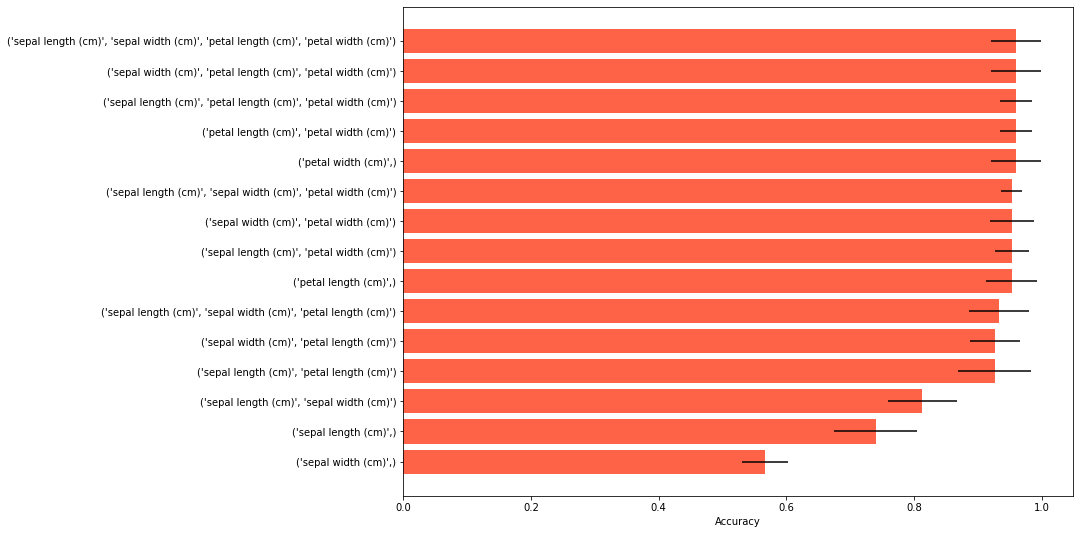

In [ ]:
# Create a horizontal bar chart for visualizing 
# the performance of each subset of features
import numpy as np
fig, ax = plt.subplots(figsize=(12,9))
y_pos = np.arange(len(efs_results))
ax.barh(y_pos, 
        efs_results['avg_score'],
        xerr=efs_results['std_dev'],
        color='tomato')
ax.set_yticks(y_pos)
ax.set_yticklabels(efs_results['feature_names'])
ax.set_xlabel('Accuracy')
plt.show()

<b>Sequential Forward Selection (SFS)</b>
<br>
SFS finds the best subset of feature by adding a feature that best improves the model at each iteration.

Mlxtend provides SequentialFeatureSelector function to perform SFS.

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

# Create an SFS object
sfs = SFS(estimator=lr,       # Use logistic regression as our classifier
          k_features=(1, 4),  # Consider any feature combination between 1 and 4
          forward=True,       # Set forward to True when we want to perform SFS
          scoring='accuracy', # The metric to use to evaluate the classifier is accuracy 
          cv=5)               # The number of cross-validations to perform is 5

# Train SFS with our dataset
sfs = sfs.fit(X_data, y_data)

# Print the results
print('Best accuracy score: %.2f' % sfs.k_score_)   # k_score_ shows the best score 
print('Best subset (indices):', sfs.k_feature_idx_) # k_feature_idx_ shows the index of features 
                                                    # that yield the best score
print('Best subset (corresponding names):', sfs.k_feature_names_) # k_feature_names_ shows the feature names that yield the best score

# Transform the dataset
X_data_new = sfs.transform(X_data)

# Print the results
print('Number of features before transformation: {}'.format(X_data.shape[1]))
print('Number of features after transformation: {}'.format(X_data_new.shape[1]))

# Show the performance of each subset of features considered by SFS
sfs_results = pd.DataFrame.from_dict(sfs.subsets_).T 
sfs_results

Best accuracy score: 0.96
Best subset (indices): (1, 2, 3)
Best subset (corresponding names): ('sepal width (cm)', 'petal length (cm)', 'petal width (cm)')
Number of features before transformation: 4
Number of features after transformation: 3


,feature_idx,cv_scores,avg_score,feature_names
1,"(3,)","[1.0, 0.9666666666666667, 0.9, 0.9333333333333333, 1.0]",0.96,"(petal width (cm),)"
2,"(2, 3)","[0.9666666666666667, 0.9666666666666667, 0.9333333333333333, 0.9333333333333333, 1.0]",0.96,"(petal length (cm), petal width (cm))"
3,"(1, 2, 3)","[0.9666666666666667, 1.0, 0.9333333333333333, 0.9, 1.0]",0.96,"(sepal width (cm), petal length (cm), petal width (cm))"
4,"(0, 1, 2, 3)","[0.9666666666666667, 1.0, 0.9333333333333333, 0.9, 1.0]",0.96,"(sepal length (cm), sepal width (cm), petal length (cm), petal width (cm))"


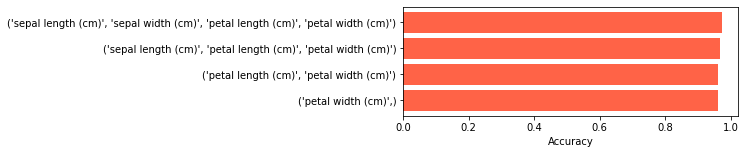

In [ ]:
# Create a horizontal bar chart for visualizing 
# the performance of each subset of features
fig, ax = plt.subplots(figsize=(6,2))
y_pos = np.arange(len(sfs_results))
ax.barh(y_pos, 
        sfs_results['avg_score'], 
        color='tomato')
ax.set_yticks(y_pos)
ax.set_yticklabels(sfs_results['feature_names'])
ax.set_xlabel('Accuracy')
plt.show()

<b>Sequential Backward Selection (SBS)</b><br>
SBS is the opposite of SFS. SBS starts with all features and removes the feature that has the least importance to the model at each iteration.

To perform SBS use, we can use SequentialFeatureSelector by Mlxtend. This is the same function that we use to perform SFS. The different is we have to set the k_features parameter to False

Best accuracy score: 0.96
Best subset (indices): (0, 1, 2, 3)
Best subset (corresponding names): ('sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)')
Number of features before transformation: 4
Number of features after transformation: 4


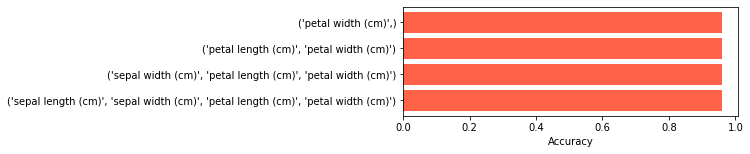

In [ ]:
# Create a logistic regression classifier
lr = LogisticRegression()

# Create an SBS object
sbs = SFS(estimator=lr,       # Use logistic regression as our classifier
          k_features=(1, 4),  # Consider any feature combination between 1 and 4
          forward=False,      # Set forward to False when we want to perform SBS
          scoring='accuracy', # The metric to use to evaluate the classifier is accuracy 
          cv=5)               # The number of cross-validations to perform is 5

# Train SBS with our dataset
sbs = sbs.fit(X_data.values, y_data, custom_feature_names=feature_names)

# Print the results
print('Best accuracy score: %.2f' % sbs.k_score_)   # k_score_ shows the best score 
print('Best subset (indices):', sbs.k_feature_idx_) # k_feature_idx_ shows the index of features 
                                                    # that yield the best score
print('Best subset (corresponding names):', sbs.k_feature_names_) # k_feature_names_ shows the feature names that yield the best score

# Transform the dataset
X_data_new = sbs.transform(X_data)

# Print the results
print('Number of features before transformation: {}'.format(X_data.shape[1]))
print('Number of features after transformation: {}'.format(X_data_new.shape[1]))

# Show the performance of each subset of features considered by SBS
sbs_results = pd.DataFrame.from_dict(sbs.subsets_).T
sbs_results

# Create a horizontal bar chart for visualizing 
# the performance of each subset of features
fig, ax = plt.subplots(figsize=(6,2))
y_pos = np.arange(len(sbs_results))
ax.barh(y_pos, 
        sbs_results['avg_score'], 
        color='tomato')
ax.set_yticks(y_pos)
ax.set_yticklabels(sbs_results['feature_names'])
ax.set_xlabel('Accuracy')
plt.show()

In [ ]:
# Compare the selection generated by EFS, SFS, and SBS
print('Best subset by EFS:', efs.best_feature_names_)
print('Best subset by SFS:', sfs.k_feature_names_)
print('Best subset by SBS:', sbs.k_feature_names_)

Best subset by EFS: ('sepal width (cm)', 'petal length (cm)', 'petal width (cm)')
Best subset by SFS: ('sepal width (cm)', 'petal length (cm)', 'petal width (cm)')
Best subset by SBS: ('sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)')


<b>Embedded Methods</b><br>
Embedded methods combine the strong points of filter and wrapper methods by taking advantage of machine algorithms that have their own built-in feature selection process. They integrate a feature selection step as a part of the training process (i.e., feature selection and training process are performed simultaneously). Embedded methods generally have a more efficient process than wrapper methods because they eliminate the need to retrain every single subset of features being examined. Some of machine algorithms that can be used for feature selection are:

LASSO regression
Ridge regression
Decision tree
Random forest
Support vector machine

<b>Feature Selection Using Random Forest</b>
<br>


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Split the dataset into 30% test and 70% training
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=0)
# Create a random forest classifier
rfc = RandomForestClassifier(random_state=0, 
                             criterion='gini') # Use gini criterion to define feature importance

# Train the classifier
rfc.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(feature_names, rfc.feature_importances_): 
    print(feature)

('sepal length (cm)', 0.102443508848457)
('sepal width (cm)', 0.023647097298179886)
('petal length (cm)', 0.479778346415163)
('petal width (cm)', 0.39413104743820015)


<b>Using Selector Object for Selecting Features</b><br>


In [ ]:
from sklearn.feature_selection import SelectFromModel
# Create a random forest classifier
rfc = RandomForestClassifier(random_state=0, 
                             criterion='gini') # Use gini criterion to define feature importance

# Create a SelectFromModel object 
sfm = SelectFromModel(estimator=rfc, # Use random forest classifier to identify features
                      threshold=0.2) # that have an importance of more than 0.2

# Train the selector
sfm = sfm.fit(X_train, y_train)

# Print the names of the most important features
print('The most important features based on random forest classifier:')
for feature_list_index in sfm.get_support(indices=True):
    print('- ' + feature_names[feature_list_index])

    # Transform the dataset
X_important_train = sfm.transform(X_train)
X_important_test = sfm.transform(X_test)

# Print the results
print('Number of features before transformation: {}'.format(X_train.shape[1]))
print('Number of features after transformation: {}'.format(X_important_train.shape[1]))

The most important features based on random forest classifier:
- petal length (cm)
- petal width (cm)
Number of features before transformation: 4
Number of features after transformation: 2


In [ ]:
# Import accuracy_score from Scikit-learn
from sklearn.metrics import accuracy_score
# Create a random forest classifier
rfc_full = RandomForestClassifier(random_state=0, criterion='gini')

# Train the classifier using dataset with full features
rfc_full.fit(X_train, y_train)

# Make predictions
pred_full = rfc_full.predict(X_test)

# Generate accuracy score
print('The accuracy of classifier with full features: {:.2f}'.format(accuracy_score(y_test, pred_full)))

The accuracy of classifier with full features: 0.98


In [ ]:
# Create a random forest classifier
rfc_lim = RandomForestClassifier(random_state=0, criterion='gini')

# Train the classifier with limited features
rfc_lim.fit(X_important_train, y_train)

# Make predictions
pred_lim = rfc_lim.predict(X_important_test)

# Generate accuracy score
print('The accuracy of classifier with limited features: {:.2f}'.format(accuracy_score(y_test, pred_lim)))

The accuracy of classifier with limited features: 0.96


<b>Feature extraction</b><br>

Principal Component Analysis (PCA) applied to this data identifies the combination of attributes (principal components, or directions in the feature space) that account for the most variance in the data. 

Linear Discriminant Analysis (LDA) tries to identify attributes that account for the most variance between classes. In particular, LDA, in contrast to PCA, is a supervised method, using known class labels.

explained variance ratio (first two components): [0.92461872 0.05306648]


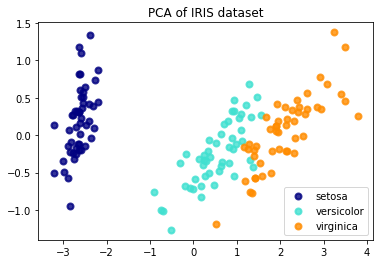

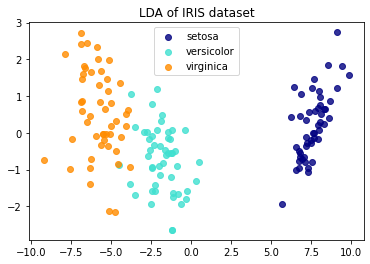

In [ ]:
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

iris = datasets.load_iris()

X = iris.data
y = iris.target
target_names = iris.target_names

pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)

# Percentage of variance explained for each components
print(
    "explained variance ratio (first two components): %s"
    % str(pca.explained_variance_ratio_)
)

plt.figure()
colors = ["navy", "turquoise", "darkorange"]
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(
        X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=0.8, lw=lw, label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("PCA of IRIS dataset")

plt.figure()
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(
        X_r2[y == i, 0], X_r2[y == i, 1], alpha=0.8, color=color, label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("LDA of IRIS dataset")

plt.show()

<b>Data Visualization</b>

 It is a way to express  data in a visual context so that patterns, correlations, trends between the data can be easily understood. Data Visualization helps in finding hidden insights .

<b>ScatterPlot</b>

These are the charts/plots that are used to observe and display relationships between variables using Cartesian Coordinates. The values (x: first variable , y: second variable) of the variables are represented by dots. Scatter plots are also known as scattergrams, scatter graphs, scatter charts , or scatter diagrams. It is best suited for situations where the dependent variable can have multiple values for the independent variable.

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0  5.1                3.5               1.4                0.2                
1  4.9                3.0               1.4                0.2                
2  4.7                3.2               1.3                0.2                
3  4.6                3.1               1.5                0.2                
4  5.0                3.6               1.4                0.2                

   target  
0  0       
1  0       
2  0       
3  0       
4  0       


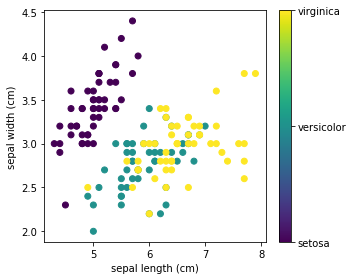

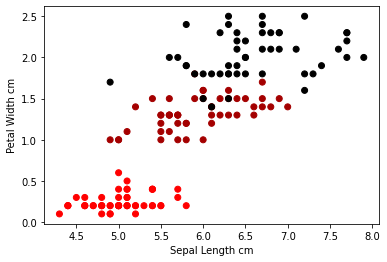

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
iris_csv_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
df_iris = pd.read_csv(iris_csv_url, header = None)
df_iris.columns =['SL', 'SW', 'PL', 'PW','Species']

print(df.head())

#df.plot(kind ="scatter",x ='sepal length (cm)', y ='petal length (cm)')
#plt.grid()

# The indices of the features that we are plotting
x_index = 0
y_index = 1

# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

plt.figure(figsize=(5, 4))
plt.scatter(iris.data[:, x_index], iris.data[:, y_index], c=iris.target)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])

plt.tight_layout()
plt.show()

x = df.iloc[:, :-1].values
y = df.iloc[:, 4].values
plt.scatter(x[:,0], x[:, 3], c=y, cmap ='flag')
plt.xlabel('Sepal Length cm')
plt.ylabel('Petal Width cm')
plt.show()

<b>Line Plot</b><br>
Line plots is a graph that is used for the representation of continuous data points on a number line. Line plots are created by first plotting data points on the Cartesian plane then joining those points with a number line. Line plots can help display data points for both single variable analysis as well as multiple variable analysis.

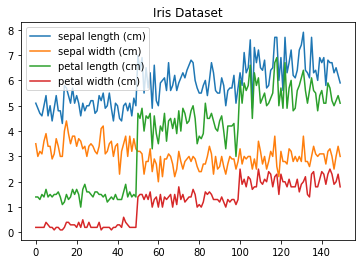

In [ ]:
# get columns to plot
columns = load_iris().feature_names
# create x data
x_data = range(0, df.shape[0])
# create figure and axis
fig, ax = plt.subplots()
# plot each column
for column in columns:
    ax.plot(x_data, df[column], label=column)
# set title and legend
ax.set_title('Iris Dataset')
ax.legend()

<b>Bar Chart</b>

Bar charts are best suited for the visualization of categorical data because they allow you to easily see the difference between feature values by measuring the size(length) of the bars. There are 2 types of bar charts depending upon their orientation (i.e. vertical or horizontal). Moreover, there are 3 types of bar charts based on their representation that is shown below.

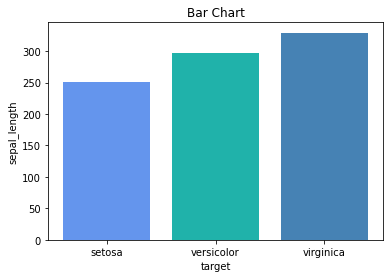

In [ ]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df = df.groupby('target')['sepal length (cm)'].sum().to_frame().reset_index()
#Creating the bar chart 
plt.bar(iris['target_names'],df['sepal length (cm)'],color = ['cornflowerblue','lightseagreen','steelblue']) 
#Adding the aesthetics
plt.title('Bar Chart')
plt.xlabel('target')
plt.ylabel('sepal_length') 
#Show the plot
plt.show()

<b>Histograms</b>

Histograms are used to represent the frequency distribution of continuous variables. The width of the histogram represents interval and the length represents frequency. To create a histogram we need to create bins of the interval which are not overlapping. Histogram allows the inspection of data for its underlying distribution, outliers, skewness.

Text(0, 0.5, 'Frequency')

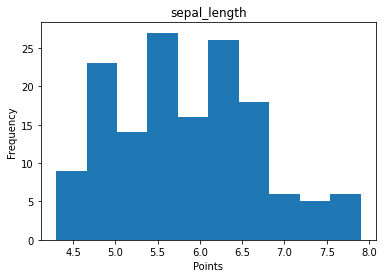

In [ ]:
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df.head()
fig, ax = plt.subplots()
# plot histogram
ax.hist(df['sepal length (cm)'])
# set title and labels
ax.set_title('sepal_length')
ax.set_xlabel('Points')
ax.set_ylabel('Frequency')

<B>Box Plot</B>

Box plot, also known as box-and-whisker plot, helps us to study the distribution of the data and to spot the outliers effectively. It is a very convenient way to visualize the spread and skew of the data.

It is created by plotting the five-number summary of the dataset: minimum, first quartile, median, third quartile, and maximum

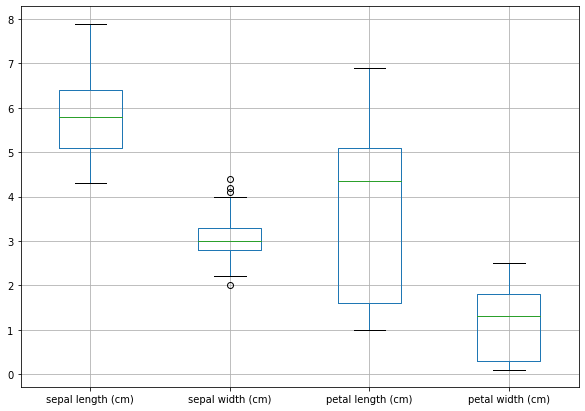

In [ ]:
X_data = pd.DataFrame(load_iris().data, columns=feature_names)
y_data = load_iris().target
plt.figure(figsize = (10, 7))
X_data.boxplot()